In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd 'drive/My Drive/bep/AES-master'

/content/drive/My Drive/bep/AES-master


In [0]:
ls

 300features_40minwords_10context
 Classification_Methods_Final.ipynb
'Copy of Data_Cleaning_and_Transformation_Word2Vec_final.ipynb'
 Data_Cleaning_and_Transformation_Word2Vec_final.ipynb
 Data_Exploration_Final.ipynb
 dataloading1.py
 dataloading1.pyc
 essay2vec.py
 essay2vec.pyc
 essay2vec.py.gdoc
 logs/
 Neural_Network_Write_Up_final.ipynb
 __pycache__/
 README.md
 requiredimports.py
 requiredimports.pyc
 savetest.txt
 training_set_rel3.xlsx
 wordembedding.png


In [0]:
pip install runipy

  Created wheel for runipy: filename=runipy-0.1.5-cp27-none-any.whl size=10139 sha256=74322cc04a53c013c5615b072e54cfbd23c143977e51aaa1b77f671aee137c81
  Stored in directory: /root/.cache/pip/wheels/38/80/04/b2dbcd5df8afdb529918d2021094048a5917b6e76a6f7b452d
Successfully built runipy


In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
pip install gensim==0.13.4.1

     |████████████████████████████████| 7.5MB 1.3MB/s 
  Created wheel for gensim: filename=gensim-0.13.4.1-cp27-cp27mu-linux_x86_64.whl size=4815608 sha256=3923259fdd643534dfabea40bbce48a116bf921cb5a1f50af79b9f9aa9fa0ce2
  Stored in directory: /root/.cache/pip/wheels/cc/4a/36/34fbd4f1e3a18fe5a2bb3d4366a44711ad0c34adc8251829d9
Successfully built gensim
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [0]:
pip install scikit-learn==0.18

In [0]:
!python requiredimports.py

In [0]:
pip install paramiko

     |████████████████████████████████| 215kB 9.3MB/s 
     |████████████████████████████████| 768kB 21.1MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 2.7MB 55.2MB/s 


In [0]:
!cat dataloading1.py

from requiredimports import *

xl_workbook = pd.ExcelFile('training_set_rel3.xlsx')
df_all = xl_workbook.parse("training_set")
df_all = df_all[df_all['domain1_score']<61]
df_all = df_all.dropna(axis = 1)
df_all = df_all.drop('rater1_domain1', 1)
df_all = df_all.drop('rater2_domain1', 1)
df_all = df_all.drop('essay_id', 1)

essay_sets = np.unique(df_all['essay_set'])

for set_no in essay_sets:
    indices = df_all[df_all['essay_set'] == set_no].index.tolist()
    grade_max = np.max(df_all.loc[indices, 'domain1_score'])
    grade_min = np.min(df_all.loc[indices, 'domain1_score'])
    df_all.loc[indices, 'domain1_score_12'] = 12*(df_all.loc[indices, 'domain1_score'] - grade_min)/(grade_max - grade_min)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all['essay'], df_all['domain1_score_12'], test_size=0.10)
#X_train, X_test, y_train, y_test = train_test_split(df_all['essay'], df_all['domain1_score'], test_size=0.10)
y_train = y

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader
!python dataloading1.py

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
[[7.2       ]
 [3.81818182]
 [3.        ]
 ...
 [6.24      ]
 [3.81818182]
 [8.16      ]]
11679
1298
12977


In [0]:
from requiredimports import *
from dataloading1 import *
%matplotlib inline

[[9.  ]
 [7.2 ]
 [0.  ]
 ...
 [4.8 ]
 [5.04]
 [0.  ]]
11679
1298
12977


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

def essay_to_wordlist(essay_v, remove_stopwords):
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def essay_to_sentences(essay_v, remove_stopwords):
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

In [0]:
sentences = []

print ("Parsing sentences from all the Essays")
for essay_v in df_all["essay"]:
    sentences += essay_to_sentences(essay_v, remove_stopwords = True)
    
print ("Complete")

Parsing sentences from all the Essays
Complete


In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

%%capture
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

num_features = 300 
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)
model.init_sims(replace=True)

model_name = "300features_40minwords_10context"
model.save(model_name)

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

def viswordembedding(word_to_use, topn_):
    okay = model.most_similar(word_to_use, topn = topn_)
    words_to_show = [word_to_use]
    words_vec = np.zeros((topn_+1, 300))
    words_vec[0,:] = model[word_to_use]

    for ii in range(0, len(okay)):
        words_to_show.append(okay[ii][0])    
        words_vec[ii+1,:] = model[okay[ii][0]]

    pca = PCA(n_components=2)
    pca.fit(words_vec)
    X = pca.transform(words_vec)
    xs = X[:, 0]
    ys = X[:, 1]

    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, marker = 'o')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title('Word Embedding Nearest Neighbors for ' + word_to_use)
    for i, w in enumerate(words_to_show):
        plt.annotate(
            w,
            xy = (xs[i], ys[i]), xytext = (3, 3),
            textcoords = 'offset points', ha = 'left', va = 'top')
    plt.savefig('wordembedding', bbox_inches = "tight")

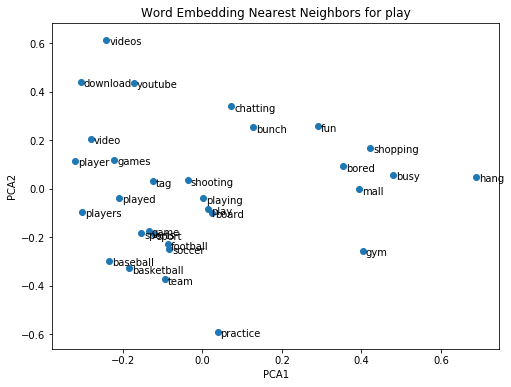

In [0]:
viswordembedding('play', 30)

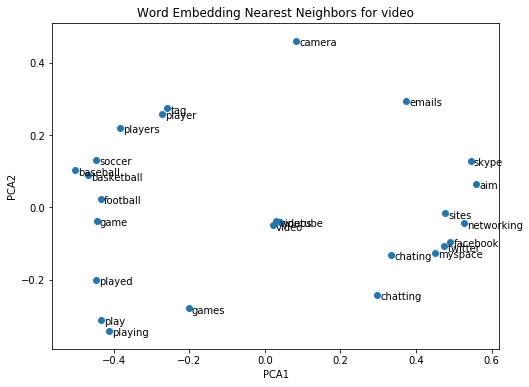

In [0]:
viswordembedding('video', 25)

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader
#Updated deprecated functions and parameters
def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])        
    featureVec = np.divide(featureVec,nwords)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [0]:
print ("Creating average feature vecs for all Essays")

clean_essays = []
for essay_v in df_all["essay"]:
    clean_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True ))
essayDataVecs = getAvgFeatureVecs(clean_essays, model, num_features )

print ("Complete")

Creating average feature vecs for all Essays
Complete


In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

def visessay(set_no):
    
    indices = df_all[df_all['essay_set'] == set_no].index.tolist()
    
    if set_no == 8:
        indices = [i - 1 for i in indices]

    splicedDataVecs = essayDataVecs[indices,:]
    splicedGrades = np.array(df_all['domain1_score'][indices])
    
    n_grades = np.unique(splicedGrades)
    n = len(n_grades)
    color=iter(cm.rainbow(np.linspace(0,1,n)))
    
    pca = PCA(n_components=2)
    X = pca.fit_transform(splicedDataVecs)
    xs = X[:, 0]
    ys = X[:, 1]
    
    plt.figure(figsize=(6,4))
    
    for ii in range(n):
        index_ = [w for w in range(len(splicedGrades)) if splicedGrades[w] == n_grades[ii]]
        c = next(color)
        xs_ = xs[index_]
        ys_ = ys[index_]
        plt.scatter(xs_, ys_, marker = 'o', color = c)
        plt.title('PCA Plot of Essay Set ' + str(set_no))
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')

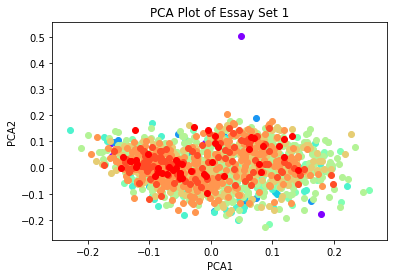

In [0]:
visessay(set_no = 1)

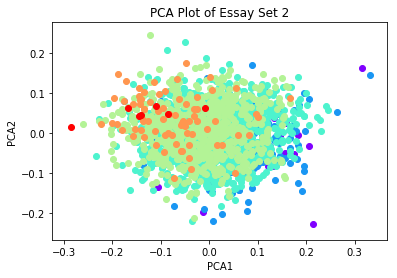

In [0]:
visessay(set_no = 2)

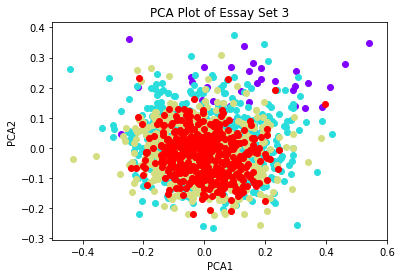

In [0]:
visessay(set_no = 3)

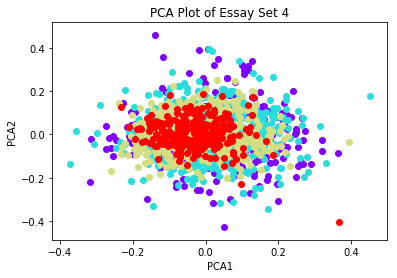

In [0]:
visessay(set_no = 4)

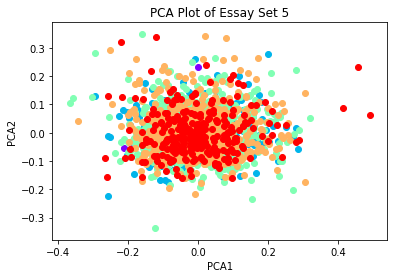

In [0]:
visessay(set_no = 5)

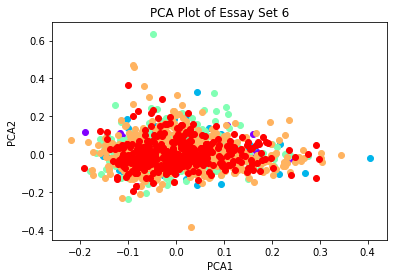

In [0]:
visessay(set_no = 6)

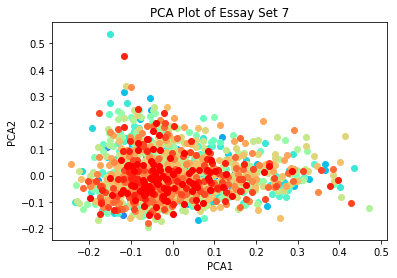

In [0]:
visessay(set_no = 7)

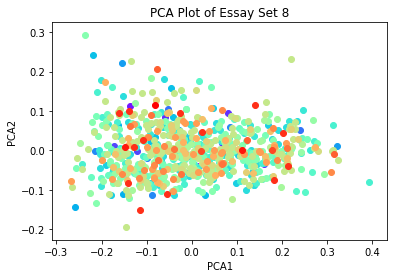

In [0]:
visessay(set_no = 8)